
#	Trying Stuff
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [3]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_feather('../classified_data/data1.feather')
data.head()

,data,class
0,"[16.60377311706543, 17.106918334960938, 20.628...",Intermittent
1,"[2.51572322845459, -0.7547169923782349, 4.0251...",Dripping
2,"[4.276729583740234, -4.0251569747924805, 1.509...",Dripping
3,"[-2.7672955989837646, 4.0251569747924805, -1.0...",Dripping
4,"[1.7610063552856445, -6.5408806800842285, -4.0...",Dripping


In [4]:
dripping = data.loc[data['class'] == 'Dripping']

dripping_data = dripping['data']

dripping_data = dripping_data.to_numpy()

# dripping_data = np.asmatrix(dripping_data)

print(dripping_data.shape)

# ax = sns.heatmap(dripping_data, linewidth=0.5)
# plt.show()



(32,)


# Creating Statistical X classifications HEAT MAP


In [9]:
data_window = pd.read_feather('../classified_data/data_window1.feather')
data_window.head()

,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode.Sjaak,spray mode.Monica
0,setup/liquid/ethanol,"[16.60377311706543, 17.106918334960938, 20.628...",2.777800e-09,3001.54,-8.72663e-09,10,10,Mon_05 Dec 2022,3000,9.681536,29.664858,5.446546,9.056603,11.108419,Intermittent,no streamer onset
1,setup/liquid/ethanol,"[2.51572322845459, -0.7547169923782349, 4.0251...",2.777800e-09,3001.54,-8.72663e-09,10,10,Mon_05 Dec 2022,3000,1.308936,11.688127,3.418790,1.257862,3.660798,Dripping,no streamer onset
2,setup/liquid/ethanol,"[4.276729583740234, -4.0251569747924805, 1.509...",2.777800e-09,3051.29,-6.71951e-09,10,10,Mon_05 Dec 2022,3050,0.059411,11.729643,3.424857,0.000000,3.425372,Dripping,no streamer onset
3,setup/liquid/ethanol,"[-2.7672955989837646, 4.0251569747924805, -1.0...",2.777800e-09,3051.29,-6.71951e-09,10,10,Mon_05 Dec 2022,3050,0.275150,11.389175,3.374785,0.251572,3.385983,Dripping,no streamer onset
4,setup/liquid/ethanol,"[1.7610063552856445, -6.5408806800842285, -4.0...",2.777800e-09,3101.34,-5.84684e-09,10,10,Mon_05 Dec 2022,3100,0.277867,10.940171,3.307593,0.251572,3.319244,Dripping,no streamer onset


In [10]:
data_window.sort_values('spray mode.Sjaak',inplace=True, ascending=False)

print(data_window)

                     name                                          data [nA]  \
145  setup/liquid/ethanol  [104.90565490722656, 111.1949691772461, 106.66...   
14   setup/liquid/ethanol  [0.7547169923782349, 4.0251569747924805, -0.75...   
148  setup/liquid/ethanol  [30.943395614624023, 38.49056625366211, 36.981...   
105  setup/liquid/ethanol  [77.23270416259766, 69.68553161621094, 78.9937...   
193  setup/liquid/ethanol  [144.15093994140625, 138.1132049560547, 145.66...   
..                    ...                                                ...   
108  setup/liquid/ethanol  [79.49685668945312, 82.01258087158203, 76.9811...   
109  setup/liquid/ethanol  [80.25157165527344, 82.76729583740234, 76.4779...   
110  setup/liquid/ethanol  [80.0, 86.03773498535156, 84.52830505371094, 7...   
111  setup/liquid/ethanol  [74.96855163574219, 80.0, 82.26414489746094, 7...   
132  setup/liquid/ethanol  [73.20755004882812, 77.23270416259766, 76.2264...   

     flow rate [m3/s]  voltage    curre

In [11]:

data_window = data_window.drop(['name', 'data [nA]','current PS', 'temperature', 'humidity', 'date and time', 'target voltage', 'spray mode.Monica'], axis=1)

data_window.columns


Index(['flow rate [m3/s]', 'voltage', 'mean', 'variance', 'deviation',
       'median', 'rms', 'spray mode.Sjaak'],
      dtype='object')

In [12]:
data_window.rename(columns = {'flow rate [m3/s]':'flow_rate', 'spray mode.Sjaak':'class'}, inplace = True)

data_window.columns


Index(['flow_rate', 'voltage', 'mean', 'variance', 'deviation', 'median',
       'rms', 'class'],
      dtype='object')

In [13]:
data_window = data_window.set_index('class')
data_window.head()

,flow_rate,voltage,mean,variance,deviation,median,rms
class,,,,,,,
Undefined,2.777800e-09,7001.59,73.113472,587.073181,24.229593,76.729561,77.023720
Undefined,2.777800e-09,3351.46,-0.036714,11.161729,3.340917,0.000000,3.341119
Undefined,2.777800e-09,7051.32,68.640610,1119.966431,33.465900,64.402512,76.364258
Undefined,2.777800e-09,5901.53,79.214523,883.018005,29.715618,77.735847,84.604721
Undefined,2.777800e-09,8301.24,139.730804,1778.030762,42.166702,136.855347,145.954575


In [14]:
data_window['voltage'] = data_window['voltage'].astype(float)
data_window.tail()

,flow_rate,voltage,mean,variance,deviation,median,rms
class,,,,,,,
Cone Jet,2.777800e-09,5951.54,77.992783,12.411920,3.523056,77.987427,78.072319
Cone Jet,2.777800e-09,6001.57,78.677483,11.858411,3.443604,78.742142,78.752808
Cone Jet,2.777800e-09,6001.57,79.203194,13.068437,3.615029,79.245285,79.285645
Cone Jet,2.777800e-09,6051.32,79.048294,12.452114,3.528755,78.993706,79.127014
Cone Jet,2.777800e-09,6651.43,89.394150,69.183197,8.317644,91.320755,89.780266


In [31]:
ConeJet_test = data_window.loc['Cone Jet']
ConeJet_test = ConeJet_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

MultiJet_test = data_window.loc['Multi Jet']
MultiJet_test = MultiJet_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

Intermittent_test = data_window.loc['Intermittent']
Intermittent_test = Intermittent_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

Undefined_test = data_window.loc['Undefined']
Undefined_test = Undefined_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

Dripping_test = data_window.loc['Dripping']
Dripping_test = Dripping_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

Corona_test = data_window.loc['Corona']
Corona_test = Corona_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

In [63]:
df = data_window.groupby(by='class').mean()
df = df.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1)

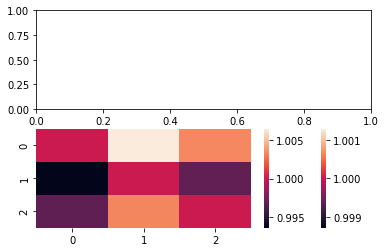

In [71]:
import seaborn as sns


fig, axs = plt.subplots(2, 1)
axs[0] = sns.heatmap(df[:1].values * 1/df[:1].values.transpose())

axs[1] = sns.heatmap(df[1:2].values * 1/df[1:2].values.transpose())

<AxesSubplot:xlabel='class'>

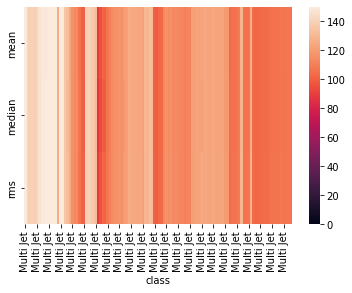

In [22]:
sns.heatmap(MultiJet_test, vmin=0, vmax=150)


<AxesSubplot:xlabel='class'>

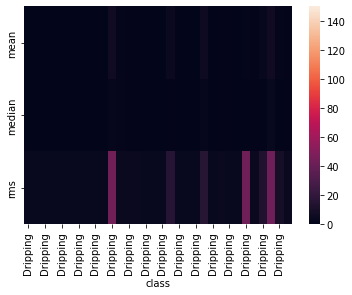

In [23]:
sns.heatmap(Dripping_test,  vmin=0, vmax=150)

<AxesSubplot:xlabel='class'>

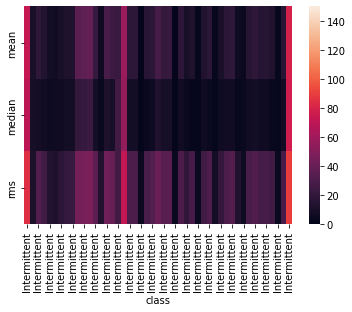

In [24]:
sns.heatmap(Intermittent_test,  vmin=0, vmax=150)